**Created this code script using a prior utility bill from my electrical provider, Seattle City Light.**

**The code takes a PDF as an input, converts it to text, and parses through the text for key phrases. This script will not work for other utility providers or if Seattle City Light changes the format of their monthly bills**

**The intent of this code is for a POC for NLP use-cases within the carbon management & power systems industries**

In [ ]:
import PyPDF2
import pandas as pd
import re

In [ ]:
#Extract text from the PDF
def extract_text_from_pdf(pdf_file_path):
    pdf_reader = PyPDF2.PdfFileReader(pdf_file_path)
    text = ''
    for page in range(pdf_reader.numPages):
        text += pdf_reader.getPage(page).extractText()
    return text

# Example usage
pdf_file = ''
text = extract_text_from_pdf(pdf_file)
print(text)

In [ ]:
# Find and print the corresponding information based on patterns
total_amount_due_regex = r"TOTAL AMOUNT DUE ON (\w+ \d{1,2}, \d{4}) (\$\d+\.\d{2})"
total_amount_due_match = re.search(total_amount_due_regex, text)
if total_amount_due_match:
    date = total_amount_due_match.group(1)
    amount_due = total_amount_due_match.group(2)
    print("Payment due date:", date)
    print("Amount due:", amount_due)

usage_regex = r"No\. of days this period:(\d+)kWh consumption this period: (\d+)"
usage_match = re.search(usage_regex, text)
if usage_match:
    days = usage_match.group(1)
    consumption = usage_match.group(2)
    print("Usage days this period:", days)
    print("kWh consumption this period:", consumption)

avg_kwh_per_day_regex = r"Avg kWh per day:([\d\.]+)"
avg_kwh_per_day_match = re.search(avg_kwh_per_day_regex, text)
if avg_kwh_per_day_match:
    avg_kwh_per_day = avg_kwh_per_day_match.group(1)
    print("Avg kWh per day:", avg_kwh_per_day)

avg_kwh_cost_regex = r"Avg kWh cost this period:(\$[\d\.]+)"
avg_kwh_cost_match = re.search(avg_kwh_cost_regex, text)
if avg_kwh_cost_match:
    avg_kwh_cost = avg_kwh_cost_match.group(1)
    print("Avg kWh cost this period:", avg_kwh_cost)



In [ ]:
# Create an empty data frame
df = pd.DataFrame(columns=['Header', 'Data'])

df = df.append({'Header': 'PAYMENT DUE DATE', 'Data': date}, ignore_index=True)
df = df.append({'Header': 'AMOUNT DUE', 'Data': amount_due}, ignore_index=True)
df = df.append({'Header': 'Usage days this period', 'Data': days}, ignore_index=True)
df = df.append({'Header': 'kWh consumption this period', 'Data': consumption}, ignore_index=True)
df = df.append({'Header': 'Avg kWh per day', 'Data': avg_kwh_per_day}, ignore_index=True)
df = df.append({'Header': 'Avg kWh cost this period', 'Data': avg_kwh_cost}, ignore_index=True)

# Print the data frame
print(df)

In [ ]:
# Save the data frame to Excel file
excel_file_path = '.xlsx'
df.to_excel(excel_file_path, index=False)

print("Data saved to:", excel_file_path)

**Screenshots of a processed and downloaded PDF version of this Notebook**

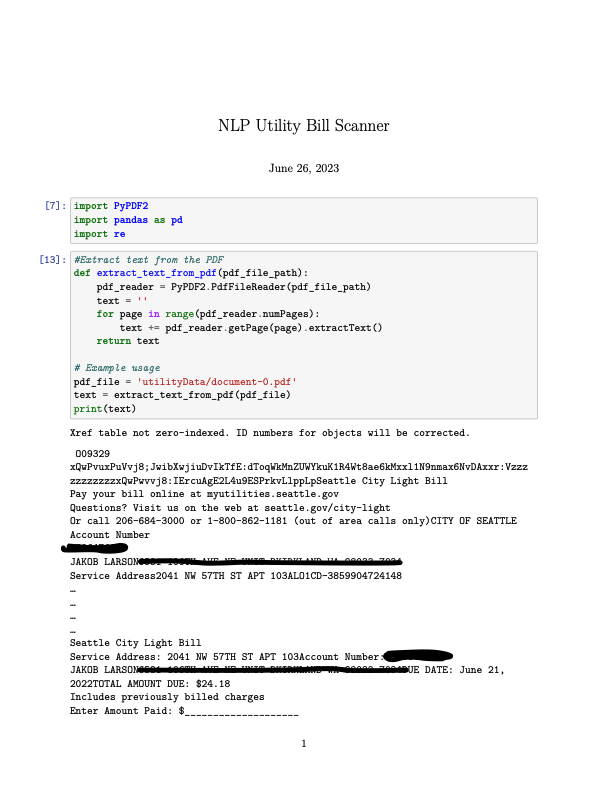

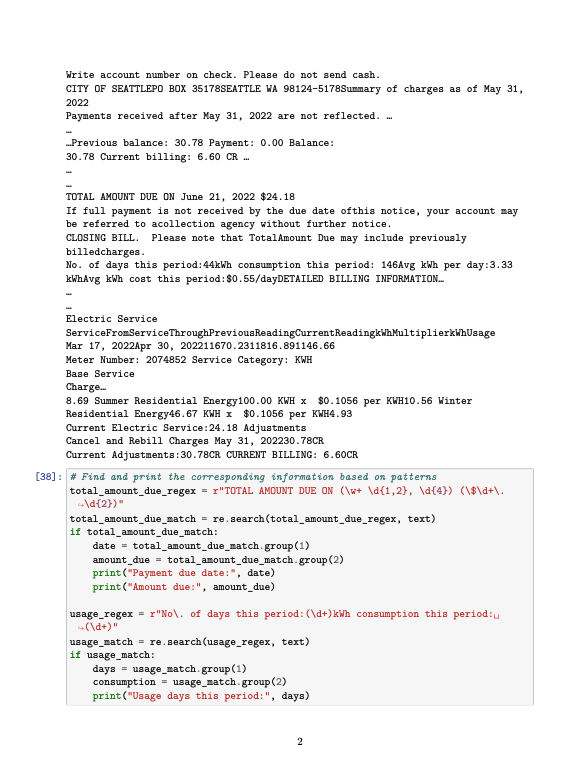

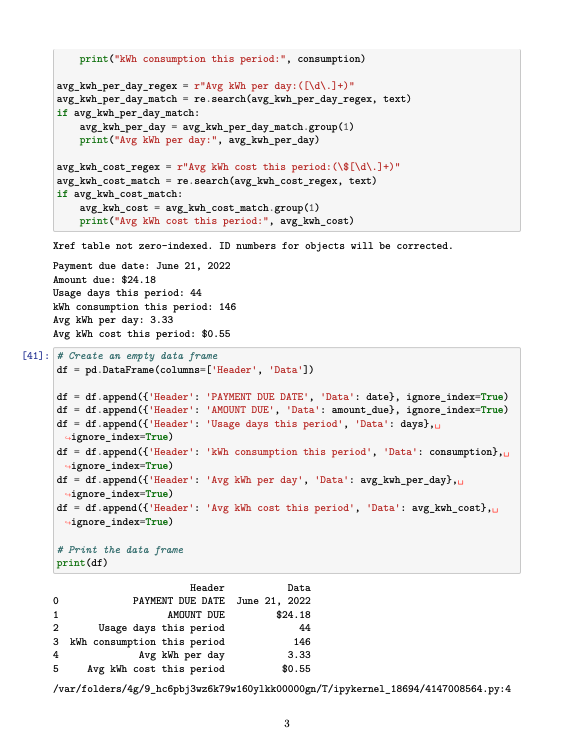

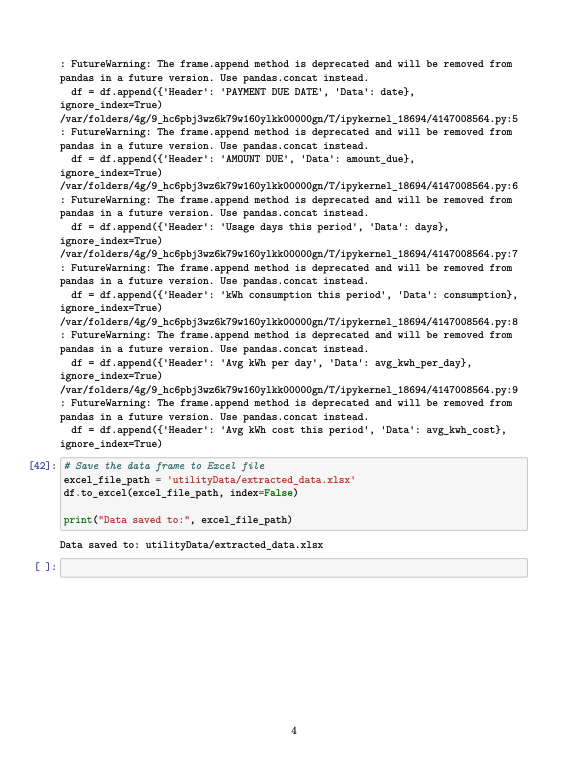

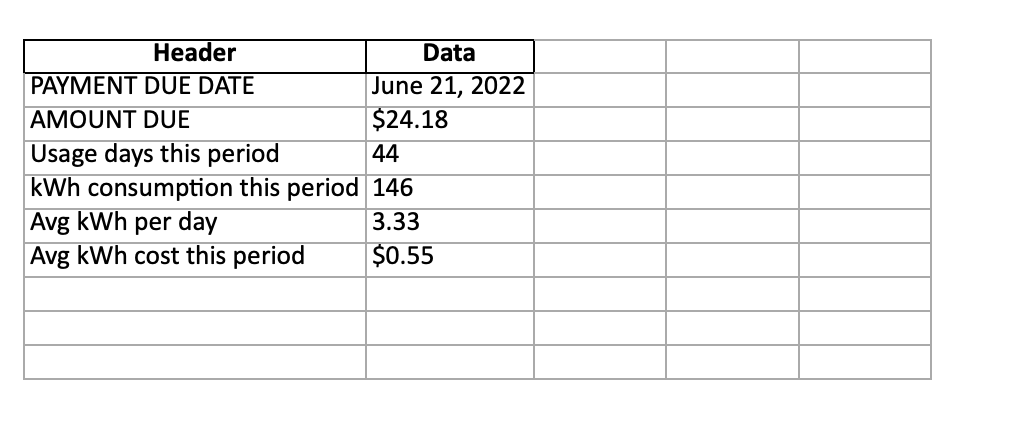